## Functions definition

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# function to read data from its predefined path and select only numerical columns
def read_data(path):
  try:
    df = pd.read_csv(path)
  except:
    df = pd.read_excel(path)

  return df.select_dtypes(include=[np.number])

In [123]:
def describe_data(df):
  print(df.describe(include='all'))
  print(df.info())

In [124]:
def box_plot(df=pd.DataFrame()):
  cols = list(df.columns)
  for col in cols:
    try:
      plt.figure()
      plt.boxplot(df[col],)
      plt.title(col)
      plt.show()
    except:
      a =1

In [125]:
def box_stackedplot(df):
  plt.figure();
  bp = df.boxplot(vert=False)

In [126]:
def bar_plot(df):
    df.plot.bar(stacked=False)

In [127]:
def hist_stackedplot(df):
  plt.figure()
  df.plot.hist(alpha=0.5,bins=20,stacked=True)

In [128]:
def hist_plot(df):
  for col in df.columns:
    try:
      df[col].plot.hist(orientation="horizontal", cumulative=True);
    except:
      a = 1
    plt.title(col)
    plt.show()

In [129]:
from pandas.plotting import scatter_matrix

def area_plot(df):
  df.plot.area(stacked=False)
def scatter_plot(df):
  scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

In [138]:
def correlation_data(df): 
  correlation = df.corr(method='pearson')
  print(correlation)
  sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [139]:
# plot all plots to fully visualize data
def plotting_data(df):
  hist_stackedplot(df)
  box_stackedplot(df)
  area_plot(df)
  scatter_plot(df)
  bar_plot(df)

## Automated EDA on Features dataset

In [133]:
df = read_data('/content/Features data set.csv')
describe_data(df)

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 432x288 with 0 Axes>

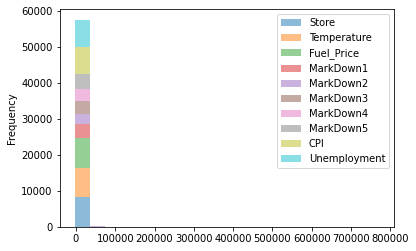

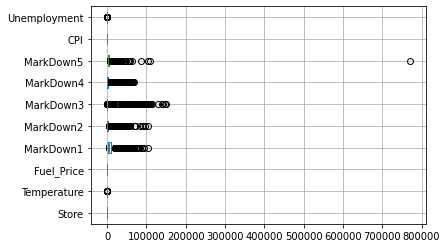

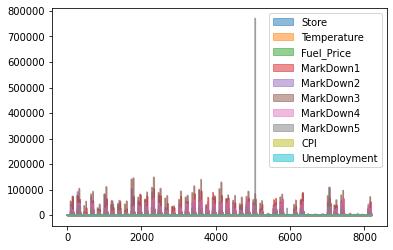

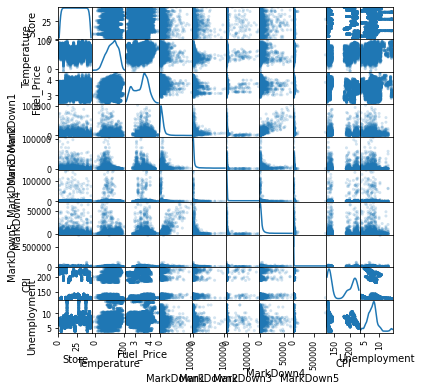

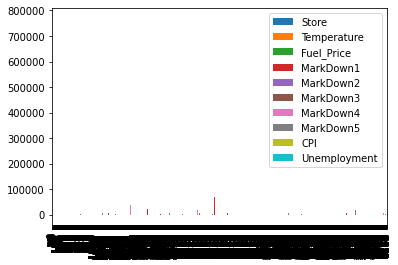

In [141]:
plotting_data(df)

                 Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -0.020566     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    0.066682     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -0.136967    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -0.044223    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -0.033279    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -0.005174    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -0.011970    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -0.209282     0.164426   -0.186696  -0.044327  -0.044896   
Unemployment  0.221153     0.150890   -0.033360   0.020501  -0.001692   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  
Store         -0.033279  -0.005174  -0.011970 -0.209282      0.221153  
Temperature   -0.077552  -0.064194  -0.003241  0.164

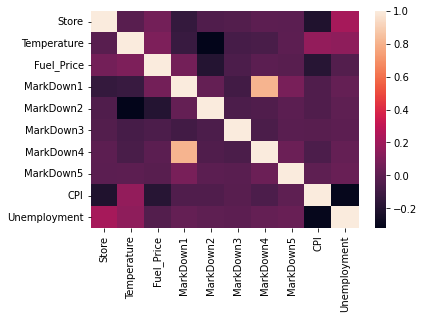

In [140]:
correlation_data(df)

## Automated EDA on Sales dataset 

In [142]:
datapath = '/content/sales data-set.csv'

In [143]:
describe_data(df)

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 432x288 with 0 Axes>

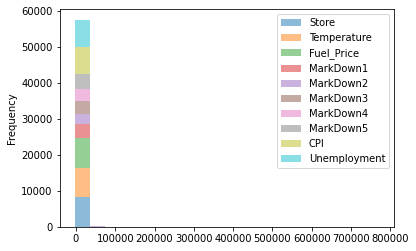

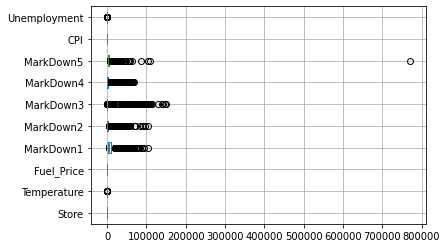

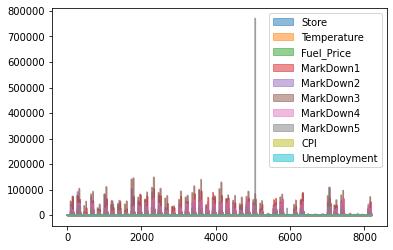

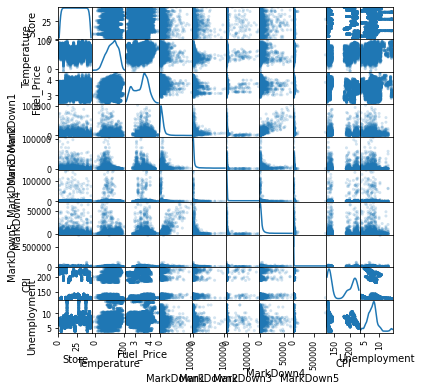

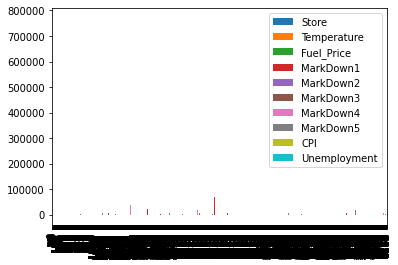

In [144]:
plotting_data(df)

                 Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -0.020566     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    0.066682     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -0.136967    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -0.044223    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -0.033279    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -0.005174    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -0.011970    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -0.209282     0.164426   -0.186696  -0.044327  -0.044896   
Unemployment  0.221153     0.150890   -0.033360   0.020501  -0.001692   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  
Store         -0.033279  -0.005174  -0.011970 -0.209282      0.221153  
Temperature   -0.077552  -0.064194  -0.003241  0.164

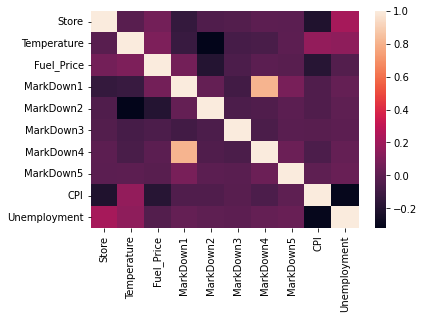

In [145]:
correlation_data(df)

## Automated EDA on Stores dataset 

In [146]:
datapath = '/content/stores data-set.csv'

In [147]:
describe_data(df)

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 432x288 with 0 Axes>

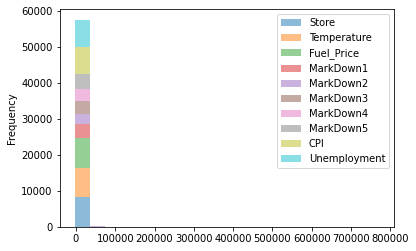

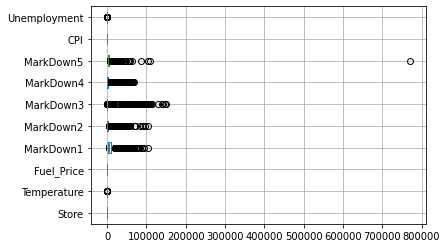

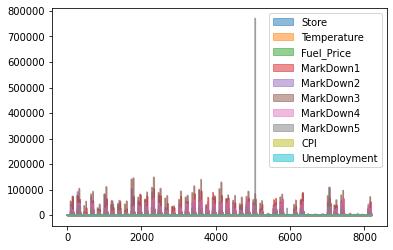

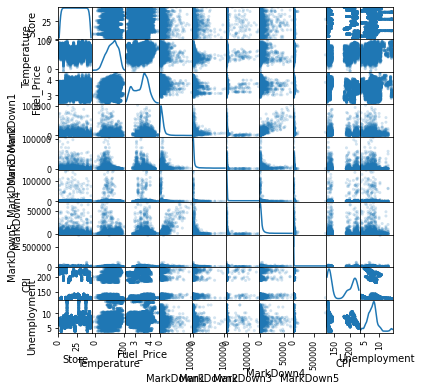

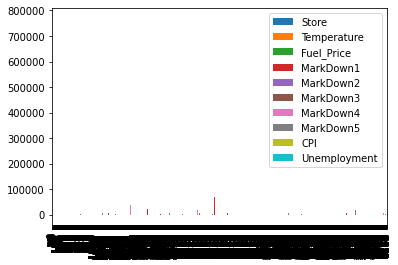

In [148]:
plotting_data(df)

                 Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -0.020566     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    0.066682     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -0.136967    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -0.044223    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -0.033279    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -0.005174    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -0.011970    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -0.209282     0.164426   -0.186696  -0.044327  -0.044896   
Unemployment  0.221153     0.150890   -0.033360   0.020501  -0.001692   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  
Store         -0.033279  -0.005174  -0.011970 -0.209282      0.221153  
Temperature   -0.077552  -0.064194  -0.003241  0.164

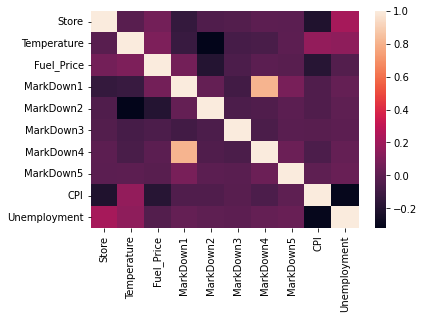

In [149]:
correlation_data(df)

## Automated EDA on police-shooting dataset 

In [150]:
datapath = '/content/fatal-police-shootings-data.csv'

In [151]:
describe_data(df)

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 432x288 with 0 Axes>

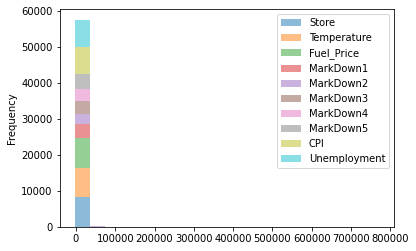

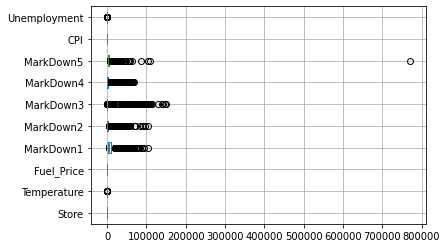

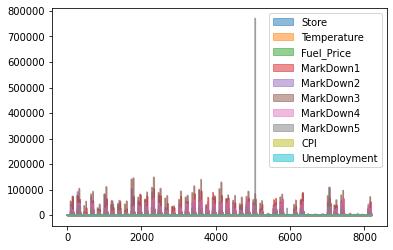

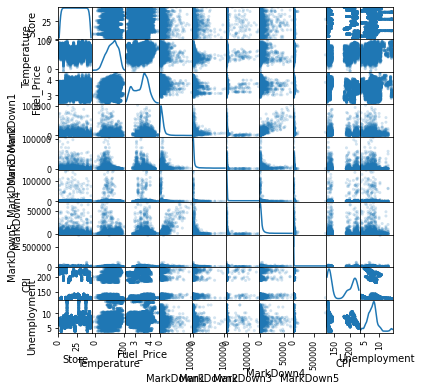

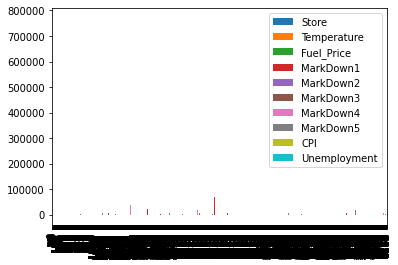

In [152]:
plotting_data(df)

                 Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -0.020566     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    0.066682     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -0.136967    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -0.044223    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -0.033279    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -0.005174    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -0.011970    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -0.209282     0.164426   -0.186696  -0.044327  -0.044896   
Unemployment  0.221153     0.150890   -0.033360   0.020501  -0.001692   

              MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  
Store         -0.033279  -0.005174  -0.011970 -0.209282      0.221153  
Temperature   -0.077552  -0.064194  -0.003241  0.164

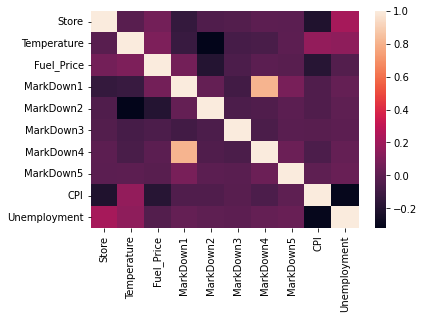

In [153]:
correlation_data(df)